# Task 4 - To Explore Decision Tree Algorithm

## Problem Statement : For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

### Do necessary imports

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the iris dataset

In [2]:
iris = pd.read_csv(r"C:\Users\Tanmay Ambatkar\Documents\Internship\The Sparks Foundation\Task 4_DT_iris\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Check the nulls in data

In [3]:
iris.isnull().sum() # no nulls are present

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Lets know the Y-Variable of the data

In [4]:
iris.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Convert the non-numeric columns to numeric

In [5]:
iris.Species.replace({"Iris-versicolor":0 , "Iris-setosa":1 , "Iris-virginica":2} , inplace = True)

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [7]:
# remove ID
iris = iris.drop(['Id'],axis = 1)

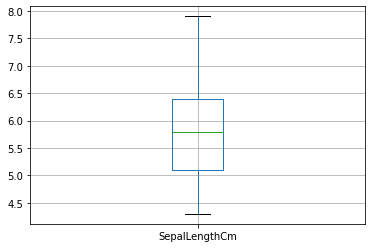

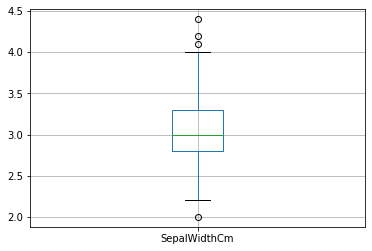

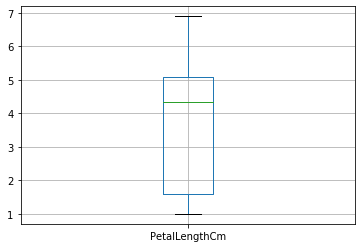

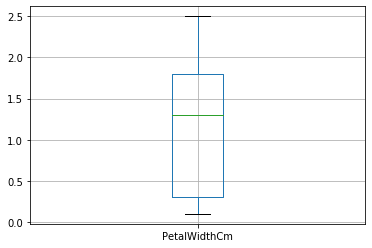

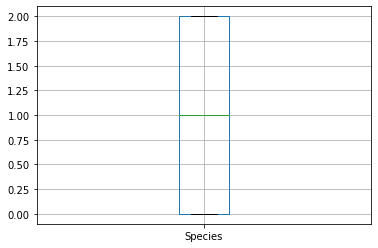

In [8]:
#check outliers
for i in iris.columns:
    plt.figure()
    iris.boxplot([i])

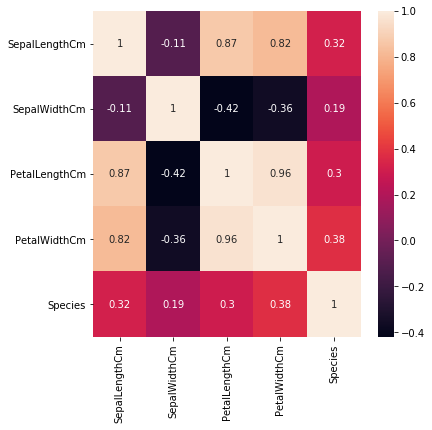

In [9]:
# Heat map
plt.figure(figsize=(6,6))
sns.heatmap(iris.corr(),annot= True )

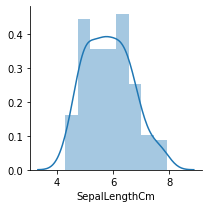

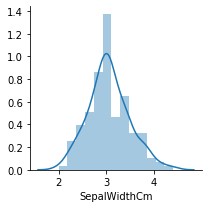

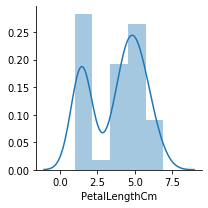

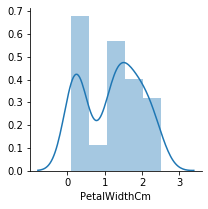

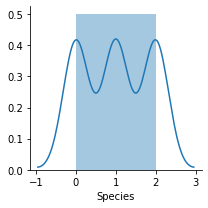

In [10]:
#check distribution of the data
for i in iris.columns:
    g = sns.FacetGrid(data=iris,legend_out=False)
    print(g.map(sns.distplot,i))

### Split the x and y variables

In [11]:
x = iris.iloc[:,0:4]

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
y = iris.iloc[:,-1]

In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

### Divide the data to train and test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

## Building the decision tree model

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [18]:
# Fit the model
dt.fit(x_train, y_train)
print("Model has been fitted !")

Model has been fitted !


In [19]:
# Predict the test data usind decision tree model
predict_dt = dt.predict(x_test)
print("Model has been predicted")

Model has been predicted


In [20]:
# see a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm_dt = confusion_matrix(predict_dt, y_test)
print(cm_dt)
print(classification_report(predict_dt, y_test))

[[14  0  1]
 [ 0 14  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00        14
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Confusion matrix is pretty good

In [21]:
from sklearn import tree

text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 1
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 0
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [22]:
import graphviz
from IPython.display import Image
from io import StringIO
import pydotplus
import pydot
from sklearn.tree import export_graphviz

In [23]:
x_train_names = x_train.columns

In [24]:
## plot decision Tree:

dot_data = StringIO()
dot_data

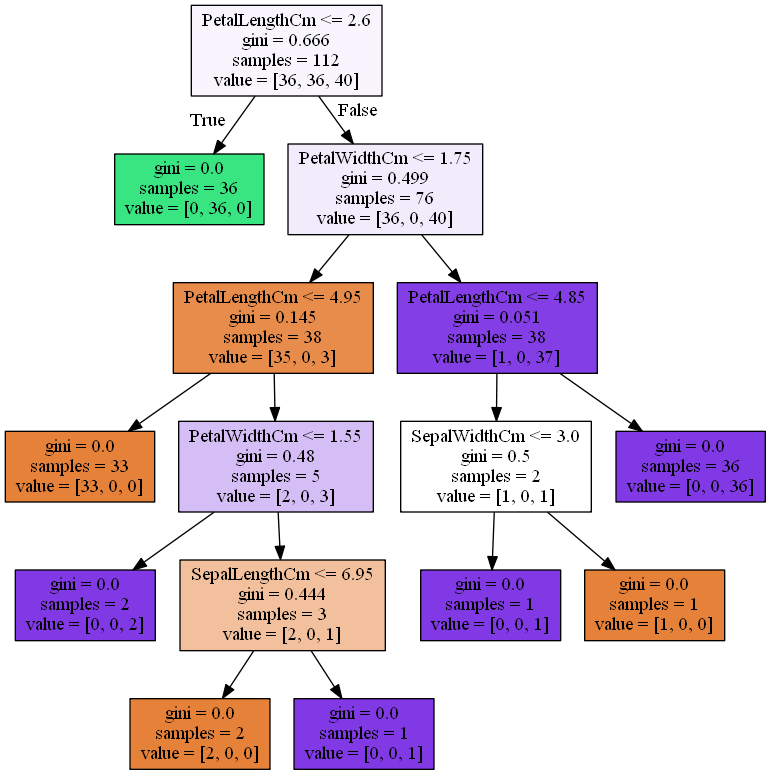

<Figure size 576x576 with 0 Axes>

In [25]:
fig = plt.figure(figsize = (8,8))
export_graphviz(dt, out_file = dot_data,
               filled = True, feature_names = x_train_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [27]:
# dump model in to pickle file
import pickle

pickle.dump(dt,open("dt_task4.pkl",'wb'))

In [28]:
model= pickle.load(open("dt_task4.pkl",'rb'))

In [29]:
model

DecisionTreeClassifier()